In [18]:
#import libararies
import numpy as np
import pandas as pd
import chardet
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Import .csv data (from: https://www.kaggle.com/kemical/kickstarter-projects)
#kickstarters_2016 = pd.read_csv('../data/ks-projects-201612.csv') returns error because of encoding problems

# look at the first ten thousand bytes to guess the character encoding, using cardet
with open("./data/ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    
#Check encoding    
print(result)

#Cardet guesses with 73% confidence the encoding is Windows-1252


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [7]:
kickstarters_2016 = pd.read_csv('./data/ks-projects-201612.csv', encoding='Windows-1252')
#Encoding seems correct, basic check of data
kickstarters_2016.head()
#TODO: Safe a utf-8 version of said data
#TODO: Fix the unnamed columns

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [8]:
#This import properly works
kickstarters_2018 = pd.read_csv('./data/ks-projects-201801.csv')

In [9]:
#Basic inspection of data #2
kickstarters_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
#TODO: Clean up data (like NaN)

Text(0.5, 1.0, 'Normalized data')

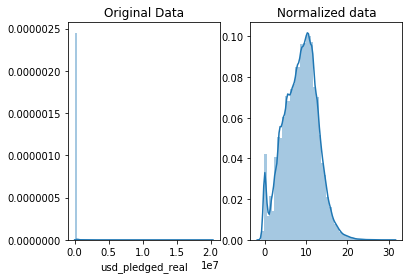

In [19]:
#TODO: Normalize data
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2018.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2018.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

In [12]:
#TODO: Start creating Algorithm